<a href="https://colab.research.google.com/github/matthew-ferreira/FrequentistML/blob/main/Ferreira_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Assignment 1: Linear Regression**

Part 0: Import and divide data





In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso, lasso_path
from numpy import linalg, transpose, identity, zeros, log10, mean
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = load_boston(return_X_y=True)
boston = load_boston()
print(X.shape)

for i in range(0,12):
  temp = max(X[:,i])
  X[:,i] = X[:,i] / temp

X_test      =   X[506-51:]
X_validate  =   X[506-102:506-51]
X_train     =   X[:404]

y_test      =   y[506-51:]
y_validate  =   y[506-102:506-51]
y_train     =   y[:404]

m = mean(y)
ma = zeros(506) + m
msqe_baseline = mean_squared_error(y, ma)
print('Baseline mean-squared error:', msqe_baseline)

(506, 13)
Baseline mean-squared error: 84.41955615616556


Part 1: Linear Regression without Regularization

In [ ]:
X_T = transpose(X_train)
B = linalg.inv(X_T@X_train) @ X_T @ y_train

X_Test = transpose(X_test)
y_hat_1 = B @ X_Test

msqe = mean_squared_error(y_test,y_hat_1)
print("Mean squared error is:" , msqe)

Mean squared error is: 16.383872770161506


Part 2: Ridge Regression

In [ ]:
B_ridge = zeros((11,13))
lam = zeros(11)

for i in range(0,10):
  B_ridge[i] = linalg.inv(X_T @ X_train + i/10 * identity(13)) @ X_T @ y_train
  lam[i] = i/10

X_Validate = transpose(X_validate)
y_hat_val_ridge = B_ridge @ X_Validate

msqe_ridge_val = zeros(10)

for i in range(0,10):
  msqe_ridge_val[i] = mean_squared_error(y_validate,y_hat_val_ridge[i])

min_index = msqe_ridge_val.argmin()
y_hat_ridge = B_ridge[min_index] @ X_Test
msqe_ridge = mean_squared_error(y_test,y_hat_ridge)

print(msqe_ridge)

14.989311625319855


Part 3: Lasso Regression

13.431045349747249


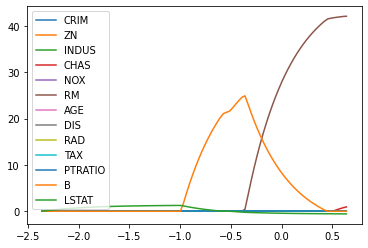

In [ ]:
r2 = zeros(100)

for i in range(0,100):
  clf = Lasso(alpha=i+1/100)
  clf.fit(X_train, y_train)
  r2[i] = clf.score(X_validate, y_validate)

max_index = r2.argmax()

clf = Lasso(alpha = (max_index+1)/100)
clf.fit(X_train,y_train)
y_hat_lasso = clf.predict(X_test)
msqe_lasso = mean_squared_error(y_test,y_hat_lasso)

print(msqe_lasso)


alphas_lasso, coeff, _ = lasso_path(X_train, y_train)
neg_log_alphas = -log10(alphas_lasso)
plt.figure(1)
for i in range(0,13):
  plt.plot(neg_log_alphas, coeff[i,:])
plt.legend(boston.feature_names)

# Note RM - average number of rooms per dwelling, 
# B - a measure of the number of black residents, 
# and LSTAT - a poverty measure